In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [83]:
df=pd.read_csv('data/columnas_final.csv')

#### Vamos a realizar un EDA sobre los datos de nuestro nuevo DataFrame que contiene solo las columnas seleciconadas para el analisis.

Redefinimos las preguntas 

Preguntas nuevas:

- ¿Cual es el ratio de hombres y mujeres segun el perfil?
- ¿Cual es perfil educativo para cada puesto?
- Herramientas mas utilizadas segun los perfiles. 
- ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil?
- Perfil segun pais que herramientas usan, en coparativa con España.


Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?


Conteo de las filas que estan ducplicadas 

In [84]:
df.duplicated().sum()

0

Calculamos el porcentaje de nulos que tenemos en cada una de nuestras columnas

In [85]:
df.isnull().sum()*100/df.shape[0]

level_0                   0.000000
index                     0.000000
time                      0.000000
age                       0.000000
gender                    0.000000
pais                      0.000000
formacion                 0.000000
puesto                    0.000000
experiencia_prog          0.000000
lenguaje_top              3.977207
exp_ml                    8.543487
tamaño_empresa           37.431179
uso_ml                   38.582374
salario                  40.742309
inversion_ml             41.543141
ppal_herramienta_data    28.814538
lenguaje_prog             3.973357
plataforma                4.000308
plat_cursos              30.189042
nubes                    64.671005
plataforma_top           87.960574
dtype: float64

In [86]:
df.head()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,"1000-9,999 employees",I do not know,$0-999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",DataCamp,I do not share my work publicly,NaN
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,"1000-9,999 employees",I do not know,"30,000-39,999",$0 ($USD),"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",edX,NaN,NaN
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,50-249 employees,We use ML methods for generating insights (but...,"30,000-39,999","$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN


In [87]:
df.tail()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
25968,25968,25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,1-2 years,"10,000 or more employees",We are exploring ML methods (and may one day p...,"15,000-19,999","$1000-$9,999","Business intelligence software (Salesforce, Ta...","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Learn Courses,DataCamp,Udacity,Udemy,Li...","GitHub , Colab",Amazon Web Services (AWS)
25969,25969,25969,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,1-2 years,NaN,NaN,NaN,NaN,NaN,Python,PyCharm,NaN,NaN,NaN
25970,25970,25970,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,"1000-9,999 employees",I do not know,$0-999,$1-$99,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,LinkedIn Learning,NaN,NaN
25971,25971,25971,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,4-5 years,"10,000 or more employees","We have well established ML methods (i.e., mod...",NaN,NaN,NaN,"Python, SQL","Notepad++,Jupyter Notebook",NaN,NaN,NaN
25972,25972,25972,255,18-21,Man,India,Bachelor’s degree,Business Analyst,I have never written code,NaN,NaN,0-49 employees,I do not know,$0-999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,None,NaN,NaN


In [88]:
df.dtypes

level_0                   int64
index                     int64
time                      int64
age                      object
gender                   object
pais                     object
formacion                object
puesto                   object
experiencia_prog         object
lenguaje_top             object
exp_ml                   object
tamaño_empresa           object
uso_ml                   object
salario                  object
inversion_ml             object
ppal_herramienta_data    object
lenguaje_prog            object
plataforma               object
plat_cursos              object
nubes                    object
plataforma_top           object
dtype: object

In [89]:
df.shape

(25973, 21)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   level_0                25973 non-null  int64 
 1   index                  25973 non-null  int64 
 2   time                   25973 non-null  int64 
 3   age                    25973 non-null  object
 4   gender                 25973 non-null  object
 5   pais                   25973 non-null  object
 6   formacion              25973 non-null  object
 7   puesto                 25973 non-null  object
 8   experiencia_prog       25973 non-null  object
 9   lenguaje_top           24940 non-null  object
 10  exp_ml                 23754 non-null  object
 11  tamaño_empresa         16251 non-null  object
 12  uso_ml                 15952 non-null  object
 13  salario                15391 non-null  object
 14  inversion_ml           15183 non-null  object
 15  ppal_herramienta_da

In [91]:
df['puesto'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

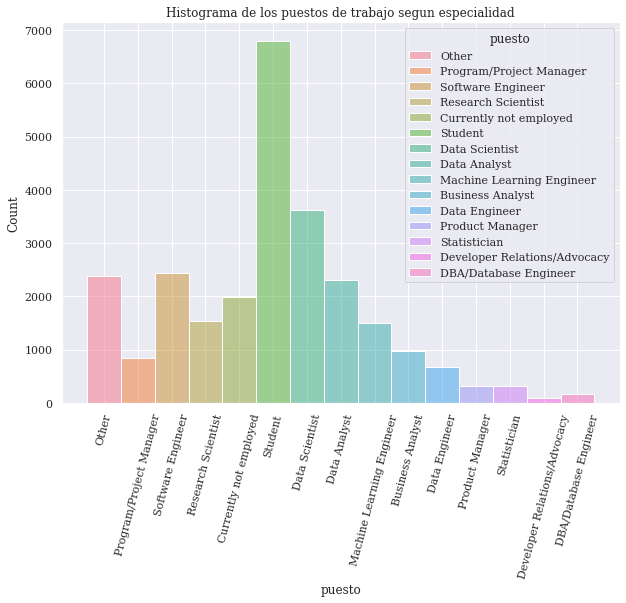

In [92]:
plt.figure(figsize =(10,7))

# seleccionamos el histplot y le añadimos el parámetro kde que nos va a mostrar una línea de tendencia 
fig = sns.histplot(x=df['puesto'], data = df, hue = 'puesto', kde=True)

fig.set_title('Histograma de los puestos de trabajo segun especialidad')

plt.xticks(rotation= 75)

# mostramos la gráfica
plt.show()

SPRINT 3

-   Limpieza de nulos
-   Categorizaciones
-   Cambiar tipo de dato (columna)  
-   Columna salarios modificar el tipo de dato y crear rango
-   Diseño de gráfica (Visualizacion), storytelling de los datos.

## SPRINT 3

Preguntas:

- ¿Cual es el ratio de hombres y mujeres segun el perfil?
- ¿Cual es perfil educativo para cada puesto?
- Herramientas mas utilizadas segun los perfiles. 
- ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil?
- Perfil segun pais que herramientas usan, en coparativa con España.


Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [93]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN



---
- ¿Cual es el ratio de hombres y mujeres segun el perfil?

In [94]:
df.gender.value_counts()

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: gender, dtype: int64

Vemos que la columna de genero nos ofrece todos los datos de manera clara para trabajar con ellos.

In [95]:
df.puesto.value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

In [96]:
df.puesto.isnull().sum()

0

In [97]:
df_crosstab = pd.crosstab(df['gender'], 
                            df['puesto']) 
df_crosstab

puesto,Business Analyst,Currently not employed,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician,Student
gender,,,,,,,,,,,,,,,
Man,779,1479,141,1759,561,2971,79,1285,1926,266,742,1233,2045,239,5093
Nonbinary,3,11,1,5,1,7,2,7,6,3,3,6,7,0,26
Prefer not to say,10,29,9,28,7,45,2,25,26,5,13,22,30,3,101
Prefer to self-describe,1,4,0,4,1,9,0,3,6,0,0,3,1,0,10
Woman,175,463,20,505,98,584,16,179,429,45,91,274,366,71,1574


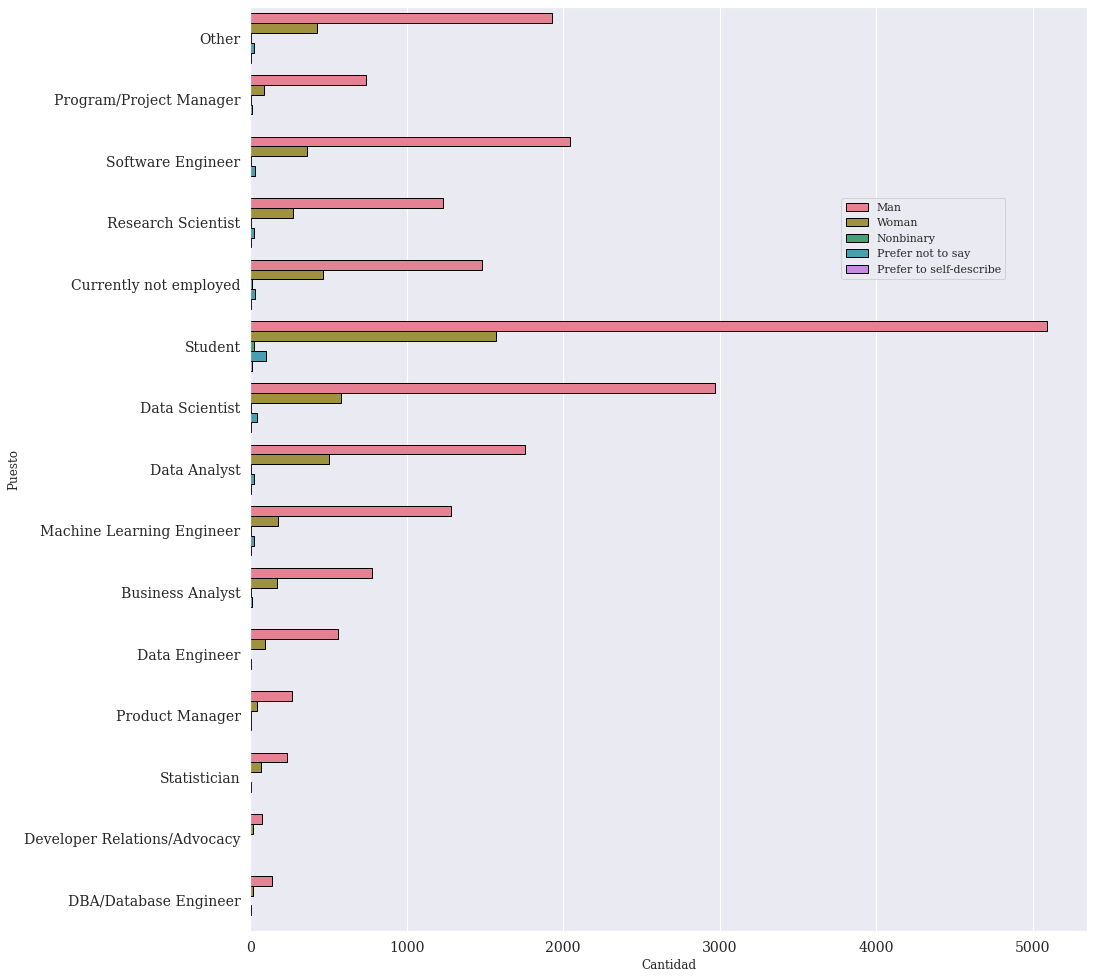

In [98]:
plt.figure(figsize = (15, 17))

fig = sns.countplot(data = df, y = "puesto", hue = "gender", palette = "husl", edgecolor = "black")

fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set(font = "serif")

plt.legend(bbox_to_anchor = (0.7, 0.7))

plt.xlabel("Cantidad", fontsize = 20, font = "serif")
plt.ylabel("Puesto", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

---

- ¿Cual es perfil educativo para cada puesto?

In [99]:
df.puesto.value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

In [100]:
df.formacion.value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: formacion, dtype: int64

In [101]:
df.formacion.isnull().sum()

0

In [102]:
df_crosstab = pd.crosstab(df['formacion'], 
                            df['puesto']) 
df_crosstab

puesto,Business Analyst,Currently not employed,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician,Student
formacion,,,,,,,,,,,,,,,
Bachelor’s degree,319,858,72,893,248,1089,36,502,721,102,230,112,1086,67,3572
Doctoral degree,49,116,2,120,33,543,6,163,317,17,82,862,116,75,294
I prefer not to answer,27,89,7,56,17,60,4,40,74,6,23,21,65,5,133
Master’s degree,487,726,73,1027,309,1726,34,656,1052,168,444,422,973,135,1900
No formal education past high school,22,55,4,37,16,30,7,20,49,3,18,9,44,0,103
Professional doctorate,6,26,0,24,2,49,3,30,48,4,17,99,20,11,21
Some college/university study without earning a bachelor’s degree,58,116,13,144,43,119,9,88,132,19,35,13,145,20,781


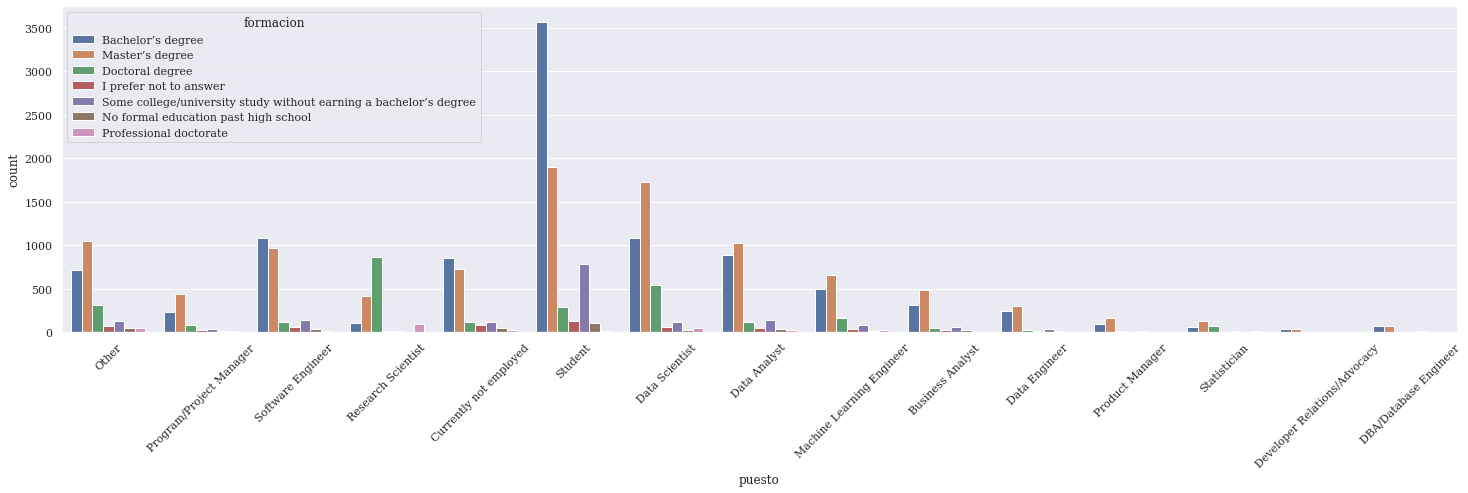

In [103]:
plt.figure( figsize=(25,6))

#for ax in fig.axes:
 #x.tick_params(labelrotation=45)

#for i in range(len(categoricas.columns)):
fig = sns.countplot(x = 'puesto', data = df, hue= 'formacion')

plt.xticks(rotation = 45)
plt.show(); 

In [104]:
df.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top'],
      dtype='object')

---
- Herramientas mas utilizadas segun los perfiles.

In [105]:
df.ppal_herramienta_data.value_counts()

Basic statistical software (Microsoft Excel, Google Sheets, etc.)       7246
Local development environments (RStudio, JupyterLab, etc.)              7170
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    1184
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                 997
Other                                                                    985
Advanced statistical software (SPSS, SAS, etc.)                          907
Name: ppal_herramienta_data, dtype: int64

In [106]:
df.ppal_herramienta_data.isnull().sum() # Ver que tratamiento hacer con los nulos de esta columna.

7484

In [107]:
df.ppal_herramienta_data.shape

(25973,)

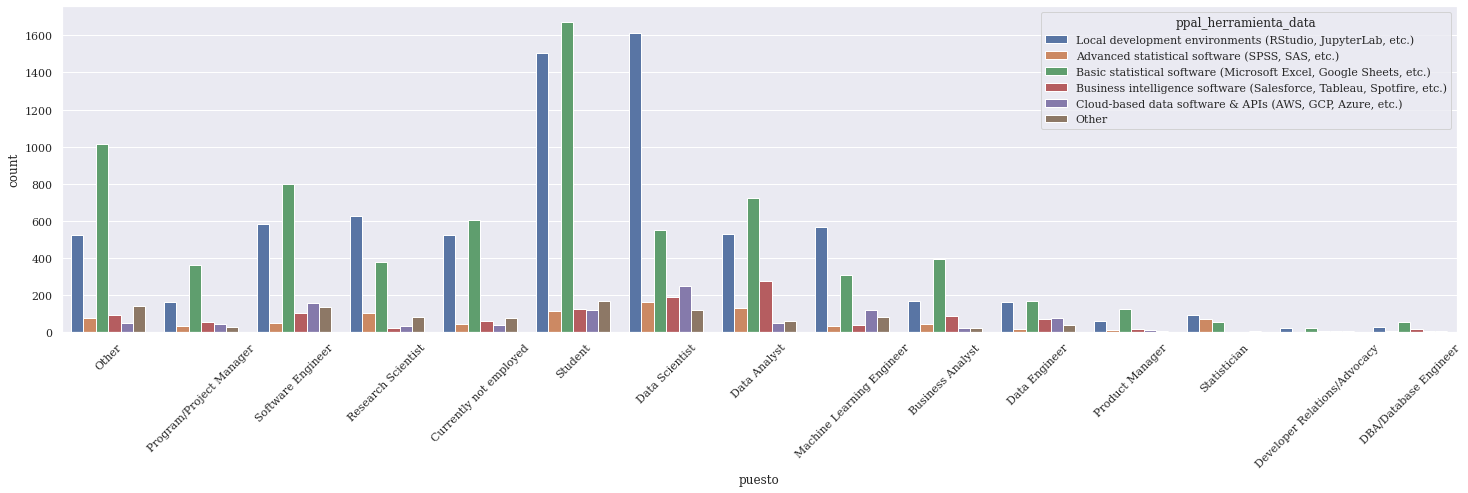

In [108]:
plt.figure( figsize=(25,6))

#for ax in fig.axes:
 #x.tick_params(labelrotation=45)

#for i in range(len(categoricas.columns)):
fig = sns.countplot(x = 'puesto', data = df, hue= 'ppal_herramienta_data')

plt.xticks(rotation = 45)
plt.show(); 

Vamos a anlizar el lenguaje de programacion usado por puesto.

In [109]:
df.lenguaje_prog.value_counts()

Python                                                      4740
Python, SQL                                                 2374
Python, R, SQL                                              1160
Python, R                                                    955
Python, C++                                                  707
                                                            ... 
 R, SQL, C, Java, MATLAB                                       1
 R, SQL, C, Java                                               1
 R, C++, Java, Javascript, MATLAB                              1
Python, R, SQL, C++, Javascript, Julia, MATLAB                 1
Python, R, C, C++, Java, Javascript, Julia, Bash, MATLAB       1
Name: lenguaje_prog, Length: 825, dtype: int64

In [110]:
df["lenguaje_prog"].isnull().sum()

1032

In [111]:
df_lenguajeprog_sinnulos = df.copy()

In [112]:
df_lenguajeprog_sinnulos["lenguaje_prog"].replace(np.nan,"unknown",inplace=True)

In [113]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
dtype: int64

Una vez recategorizados los nulos ya podemos separar la columna

In [114]:
df_lenguajeprog_sinnulos['Lenguaje']= df_lenguajeprog_sinnulos["lenguaje_prog"].apply(lambda x: x.split(',')) 

In [115]:
df_lenguajeprog_sinnulos.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,Lenguaje
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,"[Python, R]"
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,"[ SQL, C, C++, Java]"


Esta funcion nos ha creado una sola columna con una lista de valores.

Decidimos separar cada respuesta en  una columna separada.

In [116]:
df_lenguajeprog_sinnulos[['1','2','3','4','5','6','7','8','9','10','11','12']] = df_lenguajeprog_sinnulos["lenguaje_prog"].str.split(',', expand=True, n=-1)

In [117]:
pd.options.display.max_columns=None

In [118]:
df_lenguajeprog_sinnulos.sample(15)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,Lenguaje,1,2,3,4,5,6,7,8,9,10,11,12
10644,10644,10644,731,35-39,Man,Egypt,Doctoral degree,Data Analyst,5-10 years,MATLAB,2-3 years,50-249 employees,"We recently started using ML methods (i.e., mo...","5,000-7,499","$1000-$9,999","Basic statistical software (Microsoft Excel, G...","SQL, C++, MATLAB","RStudio ,MATLAB",None,I do not share my work publicly,NaN,"[ SQL, C++, MATLAB]",SQL,C++,MATLAB,None,None,None,None,None,None,None,None,None
10556,10556,10556,121,30-34,Man,India,Bachelor’s degree,Data Scientist,1-3 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NaN,NaN,NaN,[Python],Python,None,None,None,None,None,None,None,None,None,None,None
13994,13994,13994,845,25-29,Man,India,Master’s degree,Currently not employed,5-10 years,Python,1-2 years,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, C++","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",University Courses (resulting in a university ...,NaN,NaN,"[Python, C++]",Python,C++,None,None,None,None,None,None,None,None,None,None
6298,6298,6298,514,50-54,Woman,United States of America,Some college/university study without earning ...,Currently not employed,< 1 years,SQL,< 1 year,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",SQL,None,NaN,NaN,NaN,[ SQL],SQL,None,None,None,None,None,None,None,None,None,None,None
20202,20202,20202,1256,40-44,Man,Colombia,Master’s degree,DBA/Database Engineer,5-10 years,Python,2-3 years,50-249 employees,We are exploring ML methods (and may one day p...,"2,000-2,999","$10,000-$99,999","Local development environments (RStudio, Jupyt...","Python, R, SQL, Java","PyCharm , Spyder",None,"GitHub , Kaggle , Colab",NaN,"[Python, R, SQL, Java]",Python,R,SQL,Java,None,None,None,None,None,None,None,None
17146,17146,17146,713,25-29,Man,India,Master’s degree,Software Engineer,1-3 years,Python,< 1 year,50-249 employees,No (we do not use ML methods),"7,500-9,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R, SQL",Jupyter Notebook,"edX,Kaggle Learn Courses,Udemy","GitHub , Kaggle",Oracle Cloud,"[Python, R, SQL]",Python,R,SQL,None,None,None,None,None,None,None,None,None
3877,3877,3877,656,45-49,Man,Other,Master’s degree,Data Scientist,20+ years,SQL,20 or more years,"1000-9,999 employees","We have well established ML methods (i.e., mod...","40,000-49,999",$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, SQL, Javascript, Other","Notepad++,Jupyter Notebook",None,NaN,NaN,"[Python, SQL, Javascript, Other]",Python,SQL,Javascript,Other,None,None,None,None,None,None,None,None
12165,12165,12165,420,30-34,Man,China,Master’s degree,Machine Learning Engineer,3-5 years,MATLAB,< 1 year,0-49 employees,We use ML methods for generating insights (but...,"30,000-39,999",$100-$999,"Basic statistical software (Microsoft Excel, G...","Python, C","Visual Studio ,Visual Studio Code (VSCode) , S...","DataCamp,Fast.ai",Streamlit,Tencent Cloud,"[Python, C]",Python,C,None,None,None,None,None,None,None,None,None,None
25076,25076,25076,763,25-29,Woman,Indonesia,Bachelor’s degree,Other,1-3 years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,$0-999,"$1000-$9,999",NaN,"Python, Javascript","Visual Studio Code (VSCode) , Sublime Text,Jup...",NaN,NaN,NaN,"[Python, Javascript]",Python,Javascript,None,None,None,None,None,None,None,None,None,None
156,156,156,427,22-24,Woman,India,Bachelor’s degree,Student,3-5 years,Python,1-2 years,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL, C, C++, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","edX,Kaggle Learn Courses,DataCamp,Udacity,Udem...",NaN,NaN,"[Python, SQL, C, C++, MATLAB]",Python,SQL,C,C++,MATLAB,None,None,None,No

In [119]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
Lenguaje                     0
1                            0
2                         7373
3                        14439
4                        20102
5                        23167
6                        24703
7                        25428
8                        25776
9                        25896
10                       25945
11      

In [120]:
df_lenguajeprog_sinnulos["1"][0:3]

0    Python
1       SQL
2    Python
Name: 1, dtype: object

In [121]:
df_lenguajeprog_sinnulos["1"].value_counts()

Python         21860
unknown         1032
 SQL             850
 R               757
 C               350
 None            319
 Other           237
 C++             178
 Java            164
 Javascript      119
 MATLAB           71
 Bash             15
 Swift            13
 Julia             8
Name: 1, dtype: int64

In [122]:
df_lenguajeprog_sinnulos["2"].value_counts()

 SQL           7128
 R             4577
 C             2090
 C++           1648
 Java           945
 Javascript     774
 MATLAB         567
 Other          499
 Bash           289
 Julia           53
 Swift           30
Name: 2, dtype: int64

In [123]:
df_lenguajeprog_sinnulos["3"].value_counts()


 SQL           2778
 C++           2074
 C             1709
 Java          1516
 Javascript    1227
 MATLAB         775
 Bash           683
 Other          659
 Julia           73
 Swift           40
Name: 3, dtype: int64

In [124]:
df_lenguajeprog_sinnulos["4"].value_counts()


 C++           1253
 Java          1153
 Javascript    1021
 MATLAB         622
 Bash           576
 Other          568
 C              560
 Julia           67
 Swift           51
Name: 4, dtype: int64

In [125]:
df_lenguajeprog_sinnulos["5"].value_counts()

 Java          743
 Javascript    594
 MATLAB        404
 C++           382
 Other         306
 Bash          300
 Julia          45
 Swift          32
Name: 5, dtype: int64

In [126]:
df_lenguajeprog_sinnulos.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'Lenguaje', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12'],
      dtype='object')

---

In [127]:
df_explode =df_lenguajeprog_sinnulos.explode('Lenguaje')

In [128]:
df_group_leng =pd.DataFrame(df_explode.groupby('Lenguaje')['Lenguaje'].count())
df_group_leng

,Lenguaje
Lenguaje,
Bash,2216
C,4709
C++,5535
Java,4769
Javascript,4332
Julia,305
MATLAB,2935
None,319
Other,2575


In [129]:
df_group_leng.rename(columns={'Lenguaje':'conteo_eleccion'}, inplace= True)

In [130]:
df_group_leng.reset_index(inplace=True)

In [131]:
df_group_leng

,Lenguaje,conteo_eleccion
0,Bash,2216
1,C,4709
2,C++,5535
3,Java,4769
4,Javascript,4332
5,Julia,305
6,MATLAB,2935
7,None,319
8,Other,2575
9,R,5334


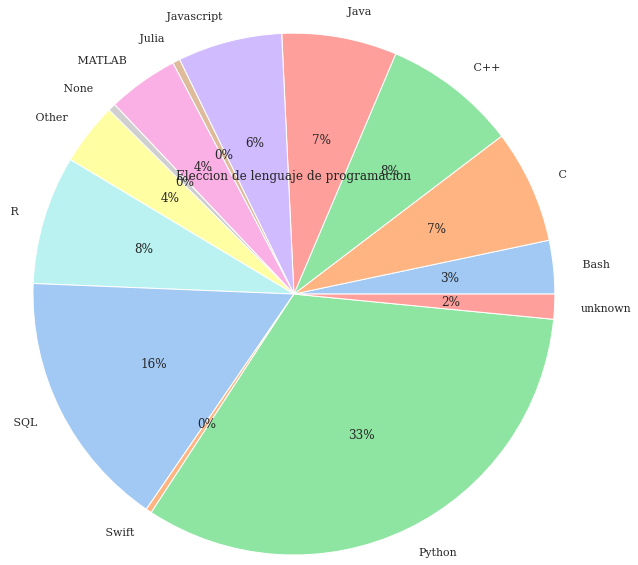

In [132]:
# Hacemos la grafica pero para el recuento total de registros respecto del explode.
plt.figure()

colors = sns.color_palette('pastel')[0:13]

plt.pie(df_group_leng['conteo_eleccion'],colors= colors, labels=df_group_leng["Lenguaje"], autopct= '%.0f%%', radius= 3)

plt.title('Eleccion de lenguaje de programacion')

plt.show();

---

Vamos a hacer el analisis pero respecto de los registros del DataFrame original sin tener en cuenta el explode.


In [133]:
total=df_lenguajeprog_sinnulos.shape[0]
total

25973

In [134]:
def porcentajes (x):
    return round((x/total)*100, 2)

In [135]:
df_group_leng['porcentaje']= df_group_leng['conteo_eleccion'].apply(porcentajes)

In [136]:
df_group_leng

,Lenguaje,conteo_eleccion,porcentaje
0,Bash,2216,8.53
1,C,4709,18.13
2,C++,5535,21.31
3,Java,4769,18.36
4,Javascript,4332,16.68
5,Julia,305,1.17
6,MATLAB,2935,11.30
7,None,319,1.23
8,Other,2575,9.91
9,R,5334,20.54


In [137]:
df_group_leng.dtypes

Lenguaje            object
conteo_eleccion      int64
porcentaje         float64
dtype: object

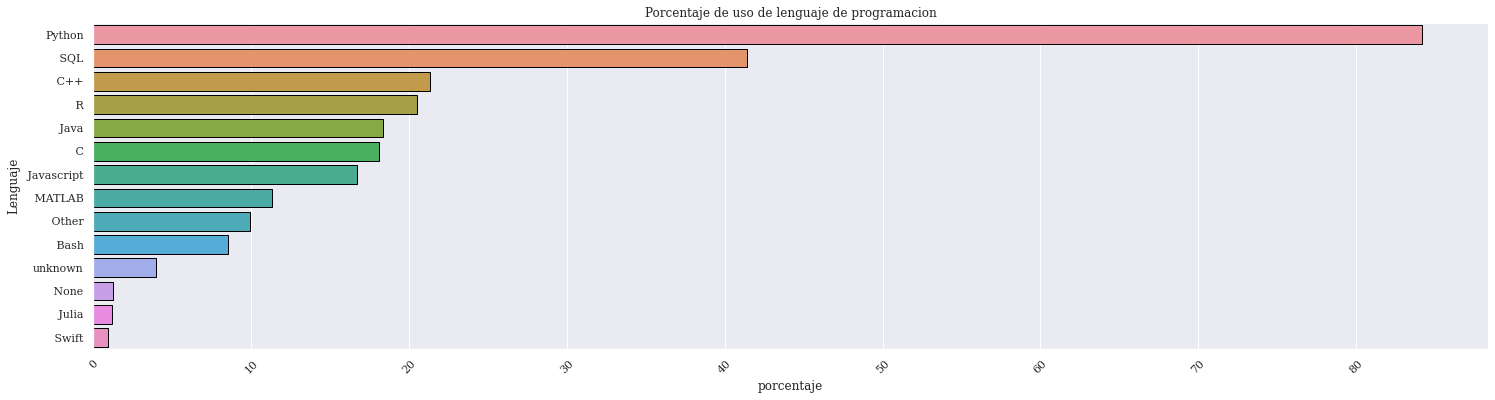

In [138]:

plt.figure( figsize=(25,6))

#for ax in fig.axes:
 #x.tick_params(labelrotation=45)

sns.set_color_codes("pastel")

ordenado =df_group_leng.sort_values("porcentaje", ascending=False)

#for i in range(len(categoricas.columns)):
fig = sns.barplot(x = 'porcentaje', y= 'Lenguaje', data = ordenado, edgecolor = 'black')

sns.set(font = "serif")

plt.title('Porcentaje de uso de lenguaje de programacion')

plt.xticks(rotation = 45)
plt.show(); 

Vemos que realizar una comparacion entre variables categoricas con el dataframe que ya tiene agrupado por lenguaje no nos sirve, por lo que vamos a trabajar directamente sobre el df_explode que tiene todos los registros.

In [139]:
df_explode.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'Lenguaje', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12'],
      dtype='object')

In [140]:
df_lenguajes=df_explode[['gender','puesto','formacion','experiencia_prog', 'Lenguaje']]
df_lenguajes

,gender,puesto,formacion,experiencia_prog,Lenguaje
0,Man,Other,Bachelor’s degree,5-10 years,Python
0,Man,Other,Bachelor’s degree,5-10 years,R
1,Man,Program/Project Manager,Master’s degree,20+ years,SQL
1,Man,Program/Project Manager,Master’s degree,20+ years,C
1,Man,Program/Project Manager,Master’s degree,20+ years,C++
...,...,...,...,...,...
25969,Man,Student,Master’s degree,1-3 years,Python
25970,Man,Research Scientist,Doctoral degree,I have never written code,unknown
25971,Man,Data Scientist,Master’s degree,5-10 years,Python
25971,Man,Data Scientist,Master’s degree,5-10 years,SQL


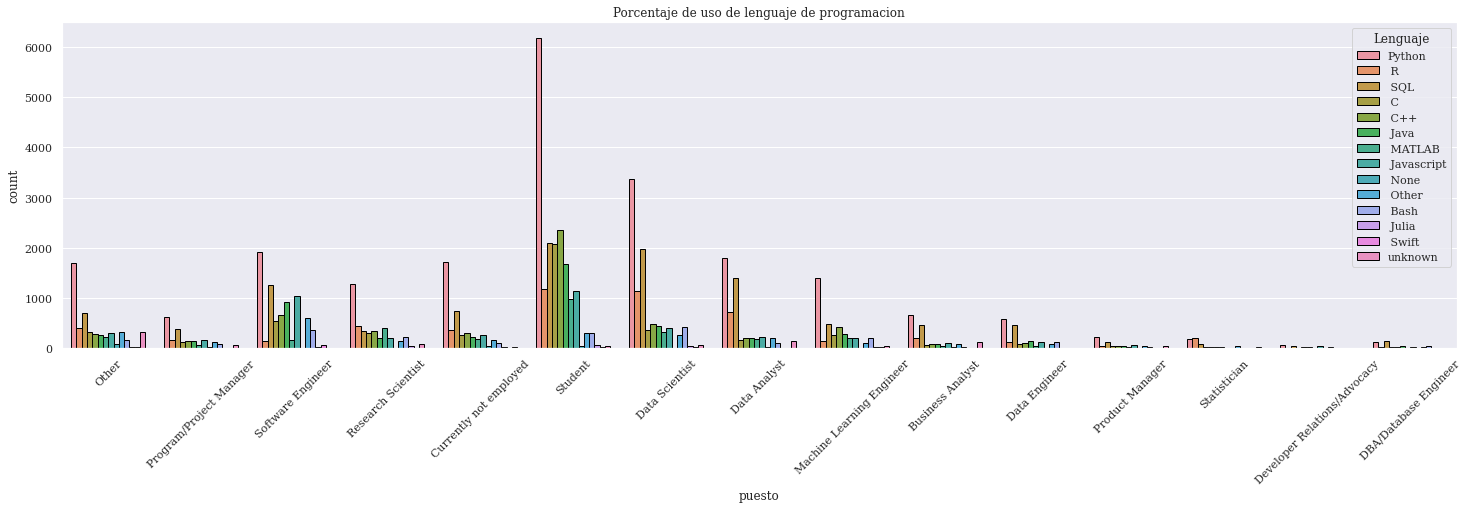

In [141]:
plt.figure( figsize=(25,6))

#for ax in fig.axes:
 #x.tick_params(labelrotation=45)

sns.set_color_codes("pastel")

#ordenado =df_group_leng.sort_values("porcentaje", ascending=False)

#for i in range(len(categoricas.columns)):
fig = sns.countplot(x = 'puesto', data = df_lenguajes, hue= 'Lenguaje',edgecolor = 'black')

sns.set(font = "serif")

plt.title('Porcentaje de uso de lenguaje de programacion')

plt.xticks(rotation = 45)
plt.show(); 

Vemos que dentro de las categorizaciones de la columna 'puesto' no deberiamos tener encuenta las categorias de : 'student', 'other' y 'currently not employed'.
por lo que vamos a proceder a generar un nuevo DataFrame que no las considere en su analisis.

In [142]:
lista_puesto= ['Program/Project Manager',
 'Software Engineer',
 'Research Scientist',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Business Analyst',
 'Data Engineer',
 'Product Manager',
 'Statistician',
 'Developer Relations/Advocacy',
 'DBA/Database Engineer']

In [143]:
df_puesto_filtrado = df_explode[df_explode['puesto'].isin(lista_puesto)]
df_puesto_filtrado.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,Lenguaje,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,SQL,SQL,C,C++,Java,None,None,None,None,None,None,None,None
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,C,SQL,C,C++,Java,None,None,None,None,None,None,None,None


In [144]:
df_puesto_filtrado['puesto'].unique()

array(['Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

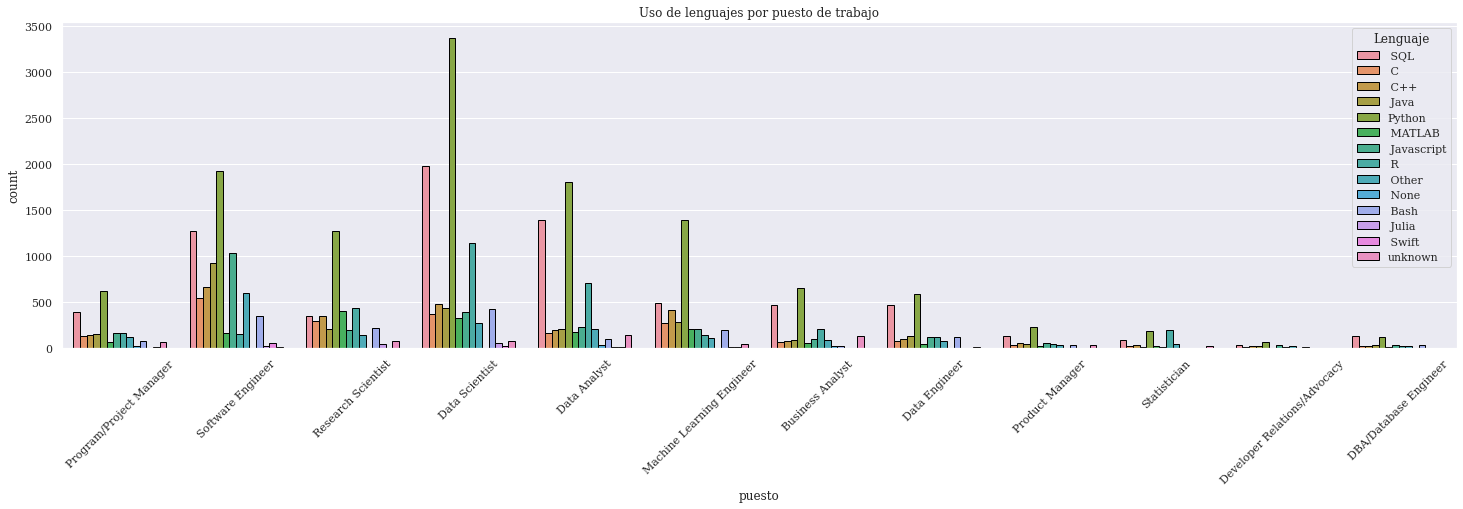

In [145]:
plt.figure( figsize=(25,6))

#for ax in fig.axes:
 #x.tick_params(labelrotation=45)

sns.set_color_codes("dark")

#ordenado =df_puesto_filtrado.sort_values("Lenguaje", ascending=False)

#for i in range(len(categoricas.columns)):
fig = sns.countplot(x = 'puesto', data = df_puesto_filtrado, hue= 'Lenguaje',edgecolor = 'black')

sns.set(font = "serif")

plt.title('Uso de lenguajes por puesto de trabajo')

plt.xticks(rotation = 45)
plt.show(); 

In [146]:
df['puesto'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

In [147]:
#df_lenguajeprog_sinnulos[['python','R','SQL','C','C++','java','javascript','julia','swift','bash','MATLAB','none','other']]

In [148]:
#def separar_col (col):

    #try:

        #df['Lenguaje'] = df[col].apply(lambda x: x[1:-1].split(',')) 

    #except:
        #return np.nan    

Próximos pasos:

* Qué conclusión podemos obtener de las columnas de lenguajes de programación?

* Cómo gestionar la columna "salario" para poder trabajar con ella? 

---

Preguntas:

- ¿Cual es el ratio de hombres y mujeres segun el perfil?
- ¿Cual es perfil educativo para cada puesto?
- Herramientas mas utilizadas segun los perfiles. 
- ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil?
- Perfil segun pais que herramientas usan, en coparativa con España.


Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [149]:
df.dtypes

level_0                   int64
index                     int64
time                      int64
age                      object
gender                   object
pais                     object
formacion                object
puesto                   object
experiencia_prog         object
lenguaje_top             object
exp_ml                   object
tamaño_empresa           object
uso_ml                   object
salario                  object
inversion_ml             object
ppal_herramienta_data    object
lenguaje_prog            object
plataforma               object
plat_cursos              object
nubes                    object
plataforma_top           object
dtype: object

---

Voy a tratar de trabajar la columna de salarios

In [150]:
df['salario'].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [151]:
df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-') #Quitamos todos los simbolos que estaban por demas en el string.

/tmp/ipykernel_14540/2148480061.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-') #Quitamos todos los simbolos que estaban por demas en el string.


In [152]:
df['salario'].unique()

array(['25000-29999', '60000-69999', '0-999', '30000-39999', nan,
       '15000-19999', '70000-79999', '2000-2999', '10000-14999',
       '5000-7499', '20000-24999', '1000-1999', '100000-124999',
       '7500-9999', '4000-4999', '40000-49999', '50000-59999',
       '3000-3999', '300000-499999', '200000-249999', '125000-149999',
       '250000-299999', '80000-89999', '90000-99999', '150000-199999',
       '-1000000', '500000-999999'], dtype=object)

In [153]:
df['salario_max']=df["salario"].str.split('-', n=1, expand=True).get(1) # Separamos el rango del salario para quedarnos con el mayor y poder convertir la columna en numerica

In [154]:
df['salario_max'].unique()

array(['29999', '69999', '999', '39999', nan, '19999', '79999', '2999',
       '14999', '7499', '24999', '1999', '124999', '9999', '4999',
       '49999', '59999', '3999', '499999', '249999', '149999', '299999',
       '89999', '99999', '199999', '1000000', '999999'], dtype=object)

In [155]:
df[df['salario_max']== None]

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max


In [156]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999


In [157]:
df.to_pickle("data/data_limpieza.pickle")

### Nos ha dado un valor None ---> ver como solucionamos lo del rango de 1000000.


## Convertir columna en numero y categorizar o ver de dividir el DataFrame en funcion de outliers  y los nulos
## Tener presente que hay muchos nulos en esta columna!